In [138]:
import pandas as pd
import numpy as np
from io import StringIO
from matplotlib import pyplot as plt
import networkx as nx
from apyori import apriori
from collections import defaultdict

In [139]:
df = pd.read_csv('http://fimi.uantwerpen.be/data/mushroom.dat', sep=' ',
                 header=None)
df.drop(columns=[23], axis=1)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,3,9,13,23,25,34,36,38,40,...,63,67,76,85,86,90,93,98,107,113
1,2,3,9,14,23,26,34,36,39,40,...,63,67,76,85,86,90,93,99,108,114
2,2,4,9,15,23,27,34,36,39,41,...,63,67,76,85,86,90,93,99,108,115
3,1,3,10,15,23,25,34,36,38,41,...,63,67,76,85,86,90,93,98,107,113
4,2,3,9,16,24,28,34,37,39,40,...,63,67,76,85,86,90,94,99,109,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,2,7,9,13,24,28,35,36,39,50,...,63,73,83,85,88,90,93,106,112,119
8120,2,3,9,13,24,28,35,36,39,50,...,63,73,83,85,87,90,93,106,110,119
8121,2,6,9,13,24,28,35,36,39,41,...,63,73,83,85,88,90,93,106,112,119
8122,1,7,10,13,24,31,34,36,38,48,...,66,67,76,85,86,90,94,102,110,119


In [140]:
sup = list(range(100, 420, 20))
min_sup = [round(number / 8100, ndigits=3) for number in sup]
min_sup

[0.012,
 0.015,
 0.017,
 0.02,
 0.022,
 0.025,
 0.027,
 0.03,
 0.032,
 0.035,
 0.037,
 0.04,
 0.042,
 0.044,
 0.047,
 0.049]

In [141]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,0.0
mean,1.517971,4.637617,9.971935,15.093550,23.584441,28.589365,34.025849,36.161497,38.690793,44.274249,...,68.149680,77.061546,85.0,86.038405,90.082718,93.696209,100.200886,109.687839,115.794682,NaN
std,0.499708,1.588969,0.775534,1.744794,0.492848,1.557709,0.158695,0.368011,0.462195,2.669652,...,1.563541,1.648595,0.0,0.257837,0.291116,0.786930,1.742226,1.381200,1.617549,NaN
min,1.000000,3.000000,9.000000,13.000000,23.000000,25.000000,34.000000,36.000000,38.000000,40.000000,...,67.000000,76.000000,85.0,86.000000,90.000000,93.000000,98.000000,107.000000,113.000000,NaN
25%,1.000000,3.000000,9.000000,13.000000,23.000000,28.000000,34.000000,36.000000,38.000000,42.000000,...,67.000000,76.000000,85.0,86.000000,90.000000,93.000000,99.000000,109.000000,114.000000,NaN
50%,2.000000,4.000000,10.000000,15.000000,24.000000,28.000000,34.000000,36.000000,39.000000,44.000000,...,67.000000,76.000000,85.0,86.000000,90.000000,94.000000,101.000000,110.000000,116.000000,NaN
75%,2.000000,6.000000,11.000000,16.000000,24.000000,29.000000,34.000000,36.000000,39.000000,46.000000,...,69.000000,77.000000,85.0,86.000000,90.000000,94.000000,102.000000,111.000000,117.000000,NaN
max,2.000000,8.000000,12.000000,22.000000,24.000000,33.000000,35.000000,37.000000,39.000000,51.000000,...,75.000000,84.000000,85.0,89.000000,92.000000,97.000000,106.000000,112.000000,119.000000,NaN


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8124 non-null   int64  
 1   1       8124 non-null   int64  
 2   2       8124 non-null   int64  
 3   3       8124 non-null   int64  
 4   4       8124 non-null   int64  
 5   5       8124 non-null   int64  
 6   6       8124 non-null   int64  
 7   7       8124 non-null   int64  
 8   8       8124 non-null   int64  
 9   9       8124 non-null   int64  
 10  10      8124 non-null   int64  
 11  11      8124 non-null   int64  
 12  12      8124 non-null   int64  
 13  13      8124 non-null   int64  
 14  14      8124 non-null   int64  
 15  15      8124 non-null   int64  
 16  16      8124 non-null   int64  
 17  17      8124 non-null   int64  
 18  18      8124 non-null   int64  
 19  19      8124 non-null   int64  
 20  20      8124 non-null   int64  
 21  21      8124 non-null   int64  
 22  

### Defining transactions

In [143]:
transactions = []

for i in range(0, len(df)):
    transactions.append([str(df.values[i, j])
                         for j in range(0, 24) if str(df.values[i, j]) != '0'])
transactions

[['1.0',
  '3.0',
  '9.0',
  '13.0',
  '23.0',
  '25.0',
  '34.0',
  '36.0',
  '38.0',
  '40.0',
  '52.0',
  '54.0',
  '59.0',
  '63.0',
  '67.0',
  '76.0',
  '85.0',
  '86.0',
  '90.0',
  '93.0',
  '98.0',
  '107.0',
  '113.0',
  'nan'],
 ['2.0',
  '3.0',
  '9.0',
  '14.0',
  '23.0',
  '26.0',
  '34.0',
  '36.0',
  '39.0',
  '40.0',
  '52.0',
  '55.0',
  '59.0',
  '63.0',
  '67.0',
  '76.0',
  '85.0',
  '86.0',
  '90.0',
  '93.0',
  '99.0',
  '108.0',
  '114.0',
  'nan'],
 ['2.0',
  '4.0',
  '9.0',
  '15.0',
  '23.0',
  '27.0',
  '34.0',
  '36.0',
  '39.0',
  '41.0',
  '52.0',
  '55.0',
  '59.0',
  '63.0',
  '67.0',
  '76.0',
  '85.0',
  '86.0',
  '90.0',
  '93.0',
  '99.0',
  '108.0',
  '115.0',
  'nan'],
 ['1.0',
  '3.0',
  '10.0',
  '15.0',
  '23.0',
  '25.0',
  '34.0',
  '36.0',
  '38.0',
  '41.0',
  '52.0',
  '54.0',
  '59.0',
  '63.0',
  '67.0',
  '76.0',
  '85.0',
  '86.0',
  '90.0',
  '93.0',
  '98.0',
  '107.0',
  '113.0',
  'nan'],
 ['2.0',
  '3.0',
  '9.0',
  '16.0',
  '24.

### Running the Apriori algorithm

In [144]:
rules = apriori(transactions, min_support=0.012, max_support=0.049,
                min_confidence=0.2, min_lift=3, min_length=2, max_length=2)

results = list(rules)
results

[RelationRecord(items=frozenset({'14.0', '101.0'}), support=0.07976366322008863, ordered_statistics=[OrderedStatistic(items_base=frozenset({'101.0'}), items_add=frozenset({'14.0'}), confidence=0.39705882352941174, lift=3.009053994732221), OrderedStatistic(items_base=frozenset({'14.0'}), items_add=frozenset({'101.0'}), confidence=0.6044776119402985, lift=3.009053994732221)]),
 RelationRecord(items=frozenset({'101.0', '29.0'}), support=0.19497784342688332, ordered_statistics=[OrderedStatistic(items_base=frozenset({'101.0'}), items_add=frozenset({'29.0'}), confidence=0.9705882352941176, lift=3.6504901960784313), OrderedStatistic(items_base=frozenset({'29.0'}), items_add=frozenset({'101.0'}), confidence=0.7333333333333334, lift=3.6504901960784317)]),
 RelationRecord(items=frozenset({'45.0', '101.0'}), support=0.06646971935007386, ordered_statistics=[OrderedStatistic(items_base=frozenset({'101.0'}), items_add=frozenset({'45.0'}), confidence=0.33088235294117646, lift=3.6722516875602698), Ord

In [145]:
def inspect(results):
    lhs = [tuple(result[2][0][0])[0] for result in results]
    rhs = [tuple(result[2][0][1])[0] for result in results]
    supports = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))


frequents = pd.DataFrame(inspect(results), columns=[
                         'Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [146]:
mosty['Support'] = round(mosty['Support'], ndigits=2)
mosty

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,101.0,14.0,0.08,0.397059,3.009054
1,101.0,29.0,0.19,0.970588,3.650490
2,101.0,45.0,0.07,0.330882,3.672252
3,101.0,70.0,0.05,0.264706,4.800158
4,101.0,71.0,0.05,0.264706,4.977941
...,...,...,...,...,...
139,73.0,83.0,0.02,1.000000,42.312500
140,73.0,9.0,0.02,1.000000,3.178404
141,79.0,95.0,0.05,1.000000,6.268519
142,80.0,95.0,0.05,0.843750,5.289062


In [147]:
frequents.sort_values(by='Left Hand Side').reset_index(drop=True)
frequents = frequents[['Left Hand Side', 'Right Hand Side']]

In [148]:
frequents['Left Hand Side'].nunique()

43

In [149]:
itemset = [g[1] for g in frequents.groupby(['Left Hand Side'])]
for item in range(0, len(itemset)):
    print(pd.Series(np.unique(itemset[item])))

0    101.0
1     14.0
2     29.0
3     45.0
4     70.0
5     71.0
6     79.0
7     80.0
8     95.0
dtype: object
0    102.0
1     31.0
2     32.0
3     48.0
4     58.0
5      7.0
dtype: object
0    107.0
1     60.0
dtype: object
0    108.0
1    115.0
2     15.0
3     26.0
4     27.0
5      4.0
6     42.0
7     55.0
8     91.0
dtype: object
0    109.0
1    114.0
2     37.0
3     54.0
4     60.0
5     64.0
dtype: object
0    112.0
1    118.0
2    119.0
3     35.0
4      7.0
5     91.0
dtype: object
0    113.0
1     25.0
2     54.0
dtype: object
0    114.0
1     37.0
2     54.0
3     60.0
dtype: object
0    115.0
1     14.0
2     15.0
3     26.0
4     27.0
5      4.0
6     55.0
dtype: object
0    102.0
1    118.0
2     58.0
3     91.0
dtype: object
0    119.0
1     31.0
2     32.0
3     35.0
4     48.0
5     58.0
6      7.0
7     73.0
8     83.0
dtype: object
0    14.0
1    55.0
2    70.0
3    71.0
4    79.0
5    80.0
6    95.0
dtype: object
0    15.0
1    55.0
dtype: object
0    107.0
1 

In [160]:
def visualizer(itemset_num):
    print(f"Visualizing item {itemset_num + 1}")
    itemset[itemset_num].reset_index(drop=True, inplace=True)
    plt.figure(figsize=(5, 5))
    g = nx.Graph()
    for row in range(0, len(itemset[itemset_num])):
        g.add_edge(itemset[itemset_num]['Left Hand Side'][row],
                   itemset[itemset_num]['Right Hand Side'][row])

    nx.draw(g, with_labels=True, node_color='#F79256', node_size=1500)

Visualizing item 1


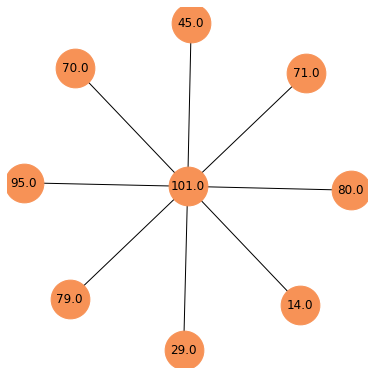

In [161]:
visualizer(0)

Visualizing item 6


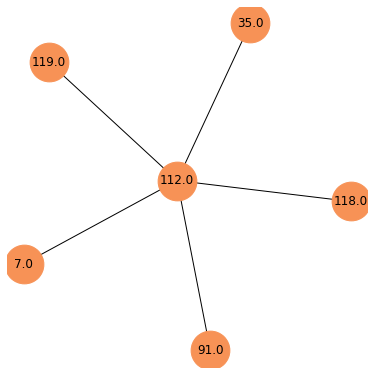

In [162]:
visualizer(5)

Visualizing item 38


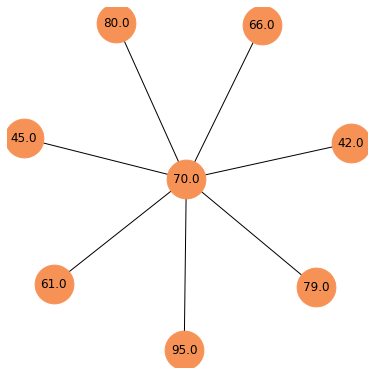

In [163]:
visualizer(37)

Visualizing item 43


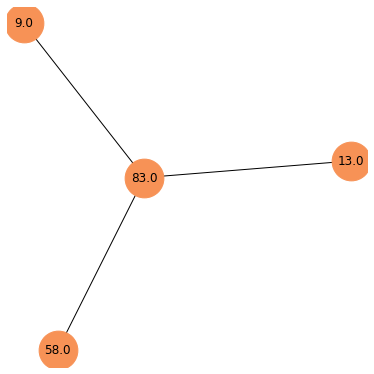

In [164]:
visualizer(42)

In [165]:
mosty.sort_values(by=['Support']).reset_index(drop=True)

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,112.0,7.0,0.01,0.305882,3.001194
1,112.0,35.0,0.01,0.335294,12.971092
2,112.0,119.0,0.01,0.329412,3.216516
3,108.0,42.0,0.01,0.280000,3.024894
4,65.0,14.0,0.01,0.422535,3.202123
...,...,...,...,...,...
139,101.0,29.0,0.19,0.970588,3.650490
140,102.0,48.0,0.21,0.723618,3.402010
141,48.0,58.0,0.21,1.000000,3.275806
142,38.0,48.0,0.21,0.687898,3.234076


In [166]:
plot_dict = {}

for item in np.unique(mosty['Support']):
    i = 0
    for row in range(0, len(mosty)):
        if item == mosty['Support'][row]:
            i += 1
            plot_dict[item] = i

In [167]:
plot_dict.values()

dict_values([5, 65, 18, 27, 1, 11, 2, 2, 2, 1, 1, 4, 1, 3, 1])

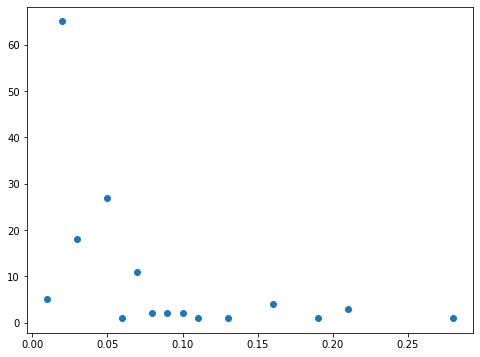

In [168]:
plt.figure(figsize=(8, 6))
plt.scatter(x=plot_dict.keys(), y=plot_dict.values())
plt.show()